In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [5]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [10]:
regr1 = linear_model.LinearRegression()

regr1.fit(X_train, Y_train)
print('R-squared simple model:')
print(regr1.score(X_train, Y_train))

regr1.fit(X_train2, Y_train)
print('R-squared complex model:')
print(regr1.score(X_train2, Y_train))

R-squared simple model:
0.573878496271703
R-squared complex model:
0.5739734452066594


In [6]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [11]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

0.5738739164402877
[ 1.36988466e-02 -7.57859433e-01 -3.25298557e-04]


## Compare Ridge and Lasso Regressions

Now we run both models at varying Alphas. As we see, the lasso drops off almost immediately then stabalizes at a ~2% accuracy at alpha .75. The ridge regression is a bit more stable, not dropping off until alpha 200.

In [19]:
# Ridge Regression

#alphas = np.arange(0,2,0.05)
alphas = [0.01, 0.1, 0.5, 0.75, 1, 1.5, 2,5,10,20,50,75,100, 200, 500]  
rsquareds_ridge = []
for a in alphas:
    ridgeregrBig = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    rsquareds_ridge.append(ridgeregrBig.score(X_train2, Y_train))
        
# LASSO Regression

rsquareds_LASSO = []

for a in alphas:
    lassBig = linear_model.Lasso(alpha=a)
    lassBig.fit(X_train2, Y_train)
    ridgeregrBig.fit(X_train2, Y_train)
    rsquareds_LASSO.append(lassBig.score(X_train2, Y_train))

results = pd.DataFrame({'alpha':alphas, 'r_sqr_ridge':rsquareds_ridge, 
                       'r_sqr_lass':rsquareds_LASSO})  
results.head(20)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.822550e-18
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.828186e-17
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.244324e-17
  overwrite_a=True).T


,alpha,r_sqr_ridge,r_sqr_lass
0,0.01,0.573972,0.573768
1,0.10,0.573972,0.563089
2,0.50,0.573971,0.308250
3,0.75,0.573970,0.026834
4,1.00,0.573969,0.026834
5,1.50,0.573966,0.026834
6,2.00,0.573964,0.026834
7,5.00,0.573955,0.026834
8,10.00,0.573946,0.026834
9,20.00,0.573934,0.026834


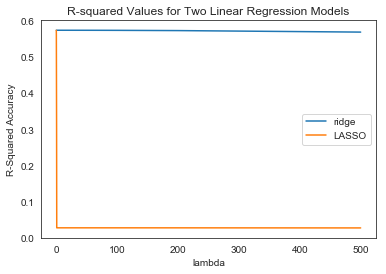

In [14]:
labels = ['ridge', 'LASSO']
plt.plot(results['alpha'], results['r_sqr_ridge'])
plt.plot(results['alpha'], results['r_sqr_lass'])
plt.title('R-squared Values for Two Linear Regression Models')
plt.xlabel('lambda')
plt.ylabel('R-Squared Accuracy')
plt.legend(labels)
plt.show()

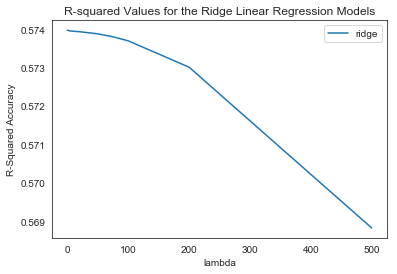

In [17]:
plt.plot(results['alpha'], results['r_sqr_ridge'])
plt.title('R-squared Values for the Ridge Linear Regression Models')
plt.xlabel('lambda')
plt.ylabel('R-Squared Accuracy')
plt.legend(['ridge'])
plt.show()

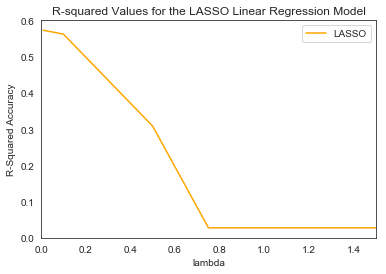

In [18]:
plt.plot(results['alpha'], results['r_sqr_lass'], color='orange')
plt.title('R-squared Values for the LASSO Linear Regression Model')
plt.xlabel('lambda')
plt.xlim(0, 1.5)
plt.ylabel('R-Squared Accuracy')
plt.legend(['LASSO'])
plt.show()